In [1]:
using ChangesOfVariables, InverseFunctions, ArraysOfArrays, Statistics
using Optimisers
using Plots
using LaTeXStrings
using Revise
using EuclidianNormalizingFlows

┌ Info: Precompiling EuclidianNormalizingFlows [eb90128f-7c94-4cd6-9130-4bb7c9abac9d]
└ @ Base loading.jl:1423


# NF Example: 

In [2]:
widths = [-1, -0.9, -0.6, -0.1, 0.4, 0.6, 0.9, 1.0]
heigths = [-1, -0.9, -0.6, -0.1, 0.4, 0.6, 0.9, 1.0]
derivaties = [10.4, 0.5, 1.2, 20.5, 0.0, 20.1, 1.9];

transf_forw = RationalQuadratic(widths, heigths, derivaties)

RationalQuadratic{Vector{Float64}}([-1.0, -0.9, -0.6, -0.1, 0.4, 0.6, 0.9, 1.0], [-1.0, -0.9, -0.6, -0.1, 0.4, 0.6, 0.9, 1.0], [10.4, 0.5, 1.2, 20.5, 0.0, 20.1, 1.9])

In [3]:
xtmp = rand(3, 5)

3×5 Matrix{Float64}:
 0.833299   0.692873  0.484664  0.550496  0.833916
 0.0446304  0.314112  0.707549  0.177659  0.435128
 0.865421   0.3185    0.678124  0.897751  0.321547

In [4]:
transf_forw(xtmp)

3×5 Matrix{Float64}:
 0.874566  0.849792  0.406614  0.425907  0.874644
 0.347417  0.395938  0.854542  0.382244  0.401704
 0.879565  0.39623   0.843553  0.896293  0.396429

In [5]:
v = with_logabsdet_jacobian(transf_forw, xtmp)

([0.8745663821850734 0.8497917583209164 … 0.42590714270749314 0.874643756881587; 0.34741740229507867 0.39593789998239304 … 0.38224428185798665 0.4017040215766478; 0.8795650589428721 0.39623024730944234 … 0.8962934371944304 0.39642915092621134], [-4.391324309968345 -6.421745897968025 … -2.0476701141701854 -7.478824073692415])

In [6]:
v[1]

3×5 Matrix{Float64}:
 0.874566  0.849792  0.406614  0.425907  0.874644
 0.347417  0.395938  0.854542  0.382244  0.401704
 0.879565  0.39623   0.843553  0.896293  0.396429

In [7]:
v[2]

1×5 adjoint(::Vector{Float64}) with eltype Float64:
 -4.39132  -6.42175  -3.93759  -2.04767  -7.47882

In [8]:
transf_inv = inverse(transf_forw)

EuclidianNormalizingFlows.RationalQuadraticInv{Vector{Float64}}([-1.0, -0.9, -0.6, -0.1, 0.4, 0.6, 0.9, 1.0], [-1.0, -0.9, -0.6, -0.1, 0.4, 0.6, 0.9, 1.0], [10.4, 0.5, 1.2, 20.5, 0.0, 20.1, 1.9])

In [9]:
transf_inv(transf_forw(xtmp))

3×5 Matrix{Float64}:
 0.833299   0.692873  0.484664  0.550496  0.833916
 0.0446304  0.314112  0.707549  0.177659  0.435128
 0.865421   0.3185    0.678124  0.897751  0.321547

In [17]:
v = with_logabsdet_jacobian(transf_inv, transf_forw(xtmp))

([0.8332993551875069 0.6928725520941023 … 0.5504959755433986 0.8339159424738651; 0.04463042211239504 0.3141121831268189 … 0.17765937207373692 0.43512754428502065; 0.8654208021598424 0.3184999630023744 … 0.8977508734422835 0.3215468074855521], [4.391324309968345 6.421745897968027 … 2.047670114170178 7.4788240736924045])

In [18]:
v[1]

3×5 Matrix{Float64}:
 0.833299   0.692873  0.484664  0.550496  0.833916
 0.0446304  0.314112  0.707549  0.177659  0.435128
 0.865421   0.3185    0.678124  0.897751  0.321547

In [19]:
v[2]

1×5 adjoint(::Vector{Float64}) with eltype Float64:
 4.39132  6.42175  3.93759  2.04767  7.47882

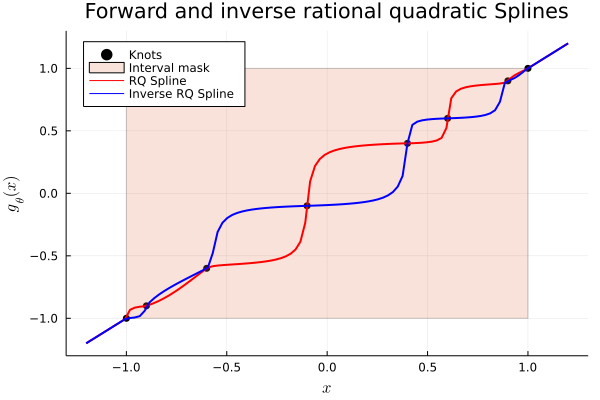

In [20]:
xvals = collect(range(-1.2, 1.2, 100))'

rectangle(w, h, x, y) = Shape(x .+ [0,w,w,0], y .+ [0,0,h,h]) # for interval mask

plot(widths, heigths, seriestype = :scatter, markercolor = :black, label = "Knots", legend = :topleft)
plot!(rectangle(2,2,-1,-1), opacity=.2, label = "Interval mask")
plot!(title = "Forward and inverse rational quadratic Splines", xlabel = L"$x$", ylabel = L"$g_{\theta}(x)$")
xlims!(-1.3, 1.3)
ylims!(-1.3, 1.3)

plot!(xvals', transf_forw(xvals)', linewidth = 2.0, linecolor = :red, label = "RQ Spline")
plot!(xvals', transf_inv(xvals)', linewidth = 2.0, linecolor = :blue, label = "Inverse RQ Spline")